<a href="https://colab.research.google.com/github/srilav/neuralnetwork/blob/main/M4_NB_MiniProject_4_Stock_Prices_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Stock Prices Anomaly Detection

## Learning Objectives

At the end of the experiment, you will be able to :

* apply PCA based analysis on various stocks data
* analyze and create time series data
* implement LSTM auto-encoders
* detect the anomalies based on the loss


## Information

Autoencoder Neural Networks try to learn data representation of its input. Usually, we want to learn an efficient encoding that uses fewer parameters/memory. The encoding should allow for output similar to the original input. In a sense, we’re forcing the model to learn the most important features of the data using as few parameters as possible.

LSTM autoencoder is an encoder that makes use of LSTM encoder-decoder architecture to compress data using an encoder and decode it to retain original structure using a decoder.

**Anomaly Detection**

Anomaly detection refers to the task of finding/identifying rare events/data points. Some applications include - bank fraud detection, tumor detection in medical imaging, and errors in written text.

A lot of supervised and unsupervised approaches for anomaly detection have been proposed. Some of the approaches include - One-class SVMs, Bayesian Networks, Cluster analysis, and Neural Networks.

We will use an LSTM Autoencoder Neural Network to detect/predict anomalies (sudden price changes) in the S&P 500 index.

## Dataset



This mini-project consists of two parts and two different stock price datasets:

### PART A

Using the **S&P 500 stock prices data of different companies**, we will perform a PCA based analysis. 

### PART B

Using the **S&P 500 stock price index time series data**, we will perform anomaly detection in the stock prices across the years. The dataset chosen is is S&P500 Daily Index a .csv format with one column with a daily timestamp and the second column with the raw, un-adjusted closing prices for each day. This long term, granular time series dataset allows researchers to have a good sized publicly available financial dataset to explore time series trends or use as part of a quantitative finance project.

## Problem Statement

Detect the stock price anomalies by implementing an LSTM autoencoder

## Grading = 20 Points

In [ ]:
#@title Download dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/SPY.csv
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/prices.csv

### Import required packages

In [5]:
import keras
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import LSTM, RepeatVector, TimeDistributed
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential, Model
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## PCA Analysis (PART-A)

Principal Component Analysis (PCA) decomposes the data into many vectors called principal components. These summaries are linear combinations of the input features that try to explain as much variance in the data as possible. By convention, these principal components are ordered by the amount of variance they can explain, with the first principal component explaining most of the data.

Perform PCA based analytics on the stock prices data from different companies.

Hint: Refer to the article [here](https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e).

### Load and pre-process the prices data (2 points)

In [25]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 11.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [45]:
!pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36085 sha256=30c4077199f79f4a19463fd5f2dcded084defd8045b4dd20326bf038b1541976
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy


In [49]:
#Get the price history of stocks and NSE indices directly in pandas dataframe-
from nsepy import get_history 
from datetime import date
#Stock history
sbin = get_history(symbol='SBIN',
                    start=date(2015,1,1), 
                    end=date(2015,1,10))
sbin[[ 'VWAP', 'Turnover']].plot(secondary_y='Turnover')

"""	Index price history
	symbol can take these values (These indexes have derivatives as well)
	"NIFTY" or "NIFTY 50",
	"BANKNIFTY" or "NIFTY BANK",
	"NIFTYINFRA" or "NIFTY INFRA",
    	"NIFTYIT" or "NIFTY IT",
    	"NIFTYMID50" or "NIFTY MIDCAP 50",
    	"NIFTYPSE" or "NIFTY PSE"
	In addition to these there are many indices
	For full list refer- http://www.nseindia.com/products/content/equities/indices/historical_index_data.htm
"""
nifty = get_history(symbol="NIFTY", 
                    start=date(2015,1,1), 
                    end=date(2015,1,10),
					index=True)
nifty[['Close', 'Turnover']].plot(secondary_y='Turnover')

KeyboardInterrupt: ignored

In [ ]:
stk1 = get_history(symbol='NIFTY',start=date(2015,1,1),end=date(2015,1,2), index=True)
print(stk1)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests

In [30]:
nifty_file=pd.read_csv('ind_nifty50list.csv')

In [31]:
nifty_file['Yahoo_Symbol']='Hello World'

In [32]:
nifty_file.Yahoo_Symbol= nifty_file.Symbol + '.NS'

In [33]:
nifty_file.to_csv('Nifty_yahoo_ticker.csv')
nifty_file

In [34]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime
nifty_tickers=pd.read_csv('Nifty_yahoo_ticker.csv')
nifty_list=nifty_tickers['Yahoo_Symbol'].tolist()

In [35]:
end = datetime.today()
begin=end-pd.DateOffset(365*15)
st=begin.strftime('%Y-%m-%d') 
ed=end.strftime('%Y-%m-%d')

In [40]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime
nifty_tickers=pd.read_csv('Nifty_yahoo_ticker.csv')
nifty_list=nifty_tickers['Yahoo_Symbol'].tolist()
end = datetime.today()
begin=end-pd.DateOffset(365*15)
st=begin.strftime('%Y-%m-%d') 
ed=end.strftime('%Y-%m-%d')
data=[]
niftyd_list=[]
for i,k in enumerate(nifty_list):
  try:
    data.append(pdr.get_data_yahoo(k,st,ed))
    niftyd_list.append(k)          
  except Exception:
    print('Not found',k)      
    pass
writer=pd.ExcelWriter("Nifty50_Data.xlsx")
for i, A in enumerate(data):
    A.to_excel(writer,sheet_name="{0}".format(niftyd_list[i]))
writer.save()

Not found ADANIPORTS.NS
Not found ASIANPAINT.NS
Not found AXISBANK.NS
Not found BAJAJ-AUTO.NS
Not found BAJFINANCE.NS
Not found BAJAJFINSV.NS
Not found BPCL.NS
Not found BHARTIARTL.NS
Not found BRITANNIA.NS
Not found CIPLA.NS
Not found COALINDIA.NS
Not found DIVISLAB.NS
Not found DRREDDY.NS
Not found EICHERMOT.NS
Not found GRASIM.NS
Not found HCLTECH.NS
Not found HDFCBANK.NS
Not found HDFCLIFE.NS
Not found HEROMOTOCO.NS
Not found HINDALCO.NS
Not found HINDUNILVR.NS
Not found HDFC.NS
Not found ICICIBANK.NS
Not found ITC.NS
Not found IOC.NS
Not found INDUSINDBK.NS
Not found INFY.NS
Not found JSWSTEEL.NS
Not found KOTAKBANK.NS
Not found LT.NS
Not found M&M.NS
Not found MARUTI.NS
Not found NTPC.NS
Not found NESTLEIND.NS
Not found ONGC.NS
Not found POWERGRID.NS
Not found RELIANCE.NS
Not found SBILIFE.NS
Not found SHREECEM.NS
Not found SBIN.NS
Not found SUNPHARMA.NS
Not found TCS.NS
Not found TATACONSUM.NS
Not found TATAMOTORS.NS
Not found TATASTEEL.NS
Not found TECHM.NS
Not found TITAN.NS
N

IndexError: ignored

In [41]:
data_old=pd.read_excel("Nifty50_Data.xlsx",sheet_name=None,index_col=0)
data_new=pd.read_excel("Nifty50_Datanew.xlsx",sheet_name=None,index_col=0)

BadZipFile: ignored

In [43]:
def convert_dict_to_list(result):
    name_list=[]
    df_list=[]
    for key in result.keys():
        name_list.append(key)
        
    for name in name_list:
        kk=result[name]
        kf=pd.concat(kk,axis=0)
        df3 = kf.loc[~kf.index.duplicated(keep='first')]
        df3.name=name
        df_list.append(df3)
        
    return df_list

In [44]:
df_list=[]
df_list=convert_dict_to_list(result)
writer=pd.ExcelWriter("Nifty50_Data.xlsx")
for i, A in enumerate(df_list):
    A.to_excel(writer,sheet_name="{0}".format(df_list[i].name))
writer.save()

NameError: ignored

In [42]:
for key in (data_old.keys() | data_new.keys()):
    if key in data_old: result.setdefault(key, []).append(data_old[key])
    if key in data_new: result.setdefault(key, []).append(data_new[key])

NameError: ignored

In [28]:
# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG'

In [ ]:
!pip install pandas-datareader

In [9]:
prices_path = "prices.csv"
data= pd.read_csv(prices_path)
data

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85.017082,28.982893,157.171890,74.207466,81.950539,82.938141,168.809998,84.622925,204.910950,334.429993,116.998917,44.048424,164.650070,187.830002,73.122215,88.918884,19.133558,51.241142,49.003220,128.423721,93.231590,87.639999,71.061058,283.679993,67.785583,108.968430,123.176743,61.148903,9.971735,49.099998,99.718460,230.298279,163.271606,222.032486,1898.010010,204.720001,259.589996,295.028076,205.982056,46.387165,...,189.381256,96.426582,40.090492,86.901367,140.557083,60.242638,149.663574,196.729996,219.449997,52.252220,20.504297,56.621544,80.132065,235.059998,55.568127,64.771545,86.955795,75.164200,51.397491,141.787598,200.223602,111.092049,20.954809,116.044952,67.740730,41.771225,151.029617,24.689568,28.591002,142.405029,59.934875,100.115349,63.633118,56.203197,78.396255,99.349007,147.579269,259.140015,49.903751,132.803421
2,83.652077,27.548195,157.181747,73.486023,81.172668,81.895088,166.820007,83.591301,204.569687,331.809998,114.939316,43.962448,164.302048,184.949997,73.151054,88.823746,18.913849,50.885765,48.624527,129.034988,93.036346,87.239998,70.043243,280.440002,66.542633,108.978081,121.654099,60.175625,9.840403,48.599998,99.856964,228.734818,161.235901,222.139359,1874.969971,200.850006,256.970001,291.115570,205.173096,45.979324,...,187.875092,95.820480,39.480896,83.603630,139.946487,60.711697,151.119431,200.880005,217.979996,52.882324,20.057474,56.018700,79.518326,231.009995,55.568127,63.774597,87.502457,76.486641,51.081936,139.371140,200.272614,112.171654,21.044018,115.020508,67.829132,41.030972,151.427734,24.604725,28.639641,140.292755,60.223114,97.810677,63.121540,55.581242,78.857689,99.037834,147.193512,256.049988,49.199547,132.823227
3,83.899353,27.219410,154.598541,74.071579,81.813271,83.094116,179.039993,84.029251,203.233841,333.709991,113.588921,43.618546,164.524399,187.119995,73.218369,89.118690,19.133558,50.741692,48.662395,129.151443,93.465851,87.550003,69.964951,285.880005,66.224434,109.296829,121.428162,58.877934,9.774739,48.389999,99.965782,230.490112,161.766525,222.081070,1902.880005,202.860001,254.589996,294.616272,205.765030,46.270645,...,187.468826,95.445290,40.061920,83.612755,139.700287,61.502666,151.466049,202.740005,224.029999,53.429035,20.722746,55.898129,79.191666,228.880005,56.047810,62.550629,87.569580,77.649673,50.775940,140.679672,200.517624,112.755219,21.320560,114.786362,67.730896,40.406082,151.507355,24.369047,28.581272,140.015091,60.136642,95.771927,63.606186,55.887280,78.347168,98.979500,146.342834,258.010010,48.600010,131.803482
4,84.156532,27.119778,152.764648,73.723213,81.346550,82.499466,180.350006,83.562103,198.846008,333.390015,116.173134,43.093136,162.532974,187.500000,73.487579,89.137718,19.200424,50.261456,48.387844,128.278198,92.460426,90.199997,70.884911,283.059998,65.806808,108.359932,119.974274,60.578697,9.690312,48.250000,100.539551,228.322357,159.817673,217.348892,1906.859985,204.850006,256.670013,293.723907,204.018814,45.959904,...,186.973373,94.973892,40.128597,84.708961,138.124527,60.757683,152.733719,203.210007,223.789993,52.984257,21.020628,55.276722,79.161980,231.979996,55.765640,66.785164,87.233925,77.143188,50.355194,140.727402,200.105988,112.833038,21.320560,113.722878,66.493172,39.954247,151.119171,24.482172,28.396437,140.679504,60.011738,97.958405,63.085632,56.183449,78.052628,99.154533,146.214264,

### Apply PCA (6 points)

* plot the explained variance ratio. Hint: `pca.explained_variance_ratio_`
* Represent the components which preserve maximum information and plot to visualize
* Compute the daily returns of the 500 company stocks. Hint: See the following [reference](https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e).
* Plot the stocks with most negative and least negative PCA weights in the pandemic period (Year 2020). Use reference as above. Discuss the least and most impacted industrial sectors in terms of stocks.

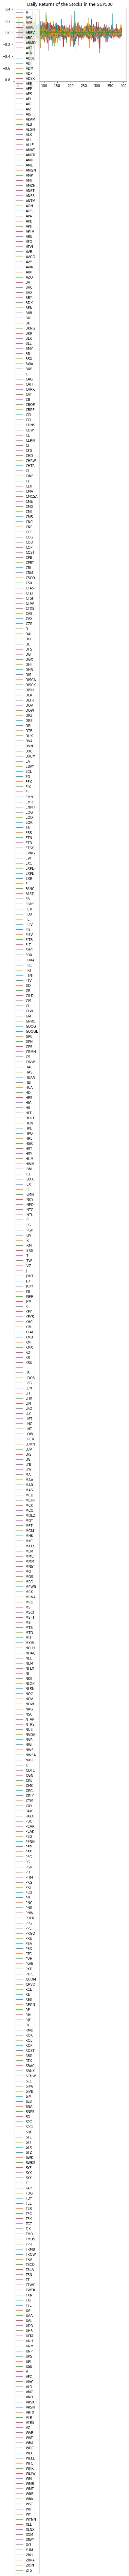

In [13]:

rs = data.apply(np.log).diff(1) 
rs.plot(title='Daily Returns of the Stocks in the S&P500')

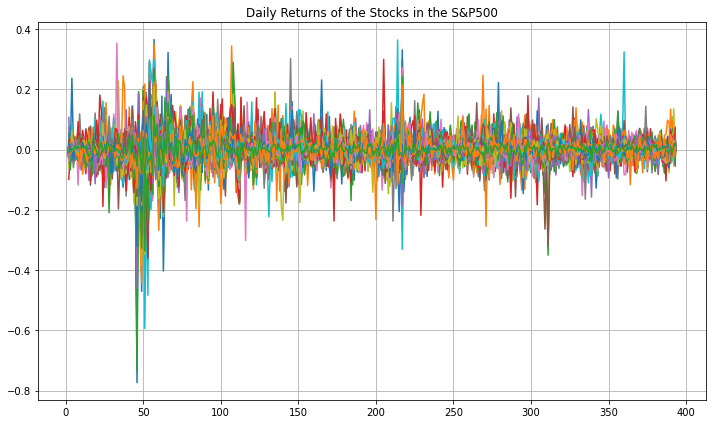

In [14]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

#### Apply T-SNE and visualize with a graph (2 points)

In [ ]:
# YOUR CODE HERE

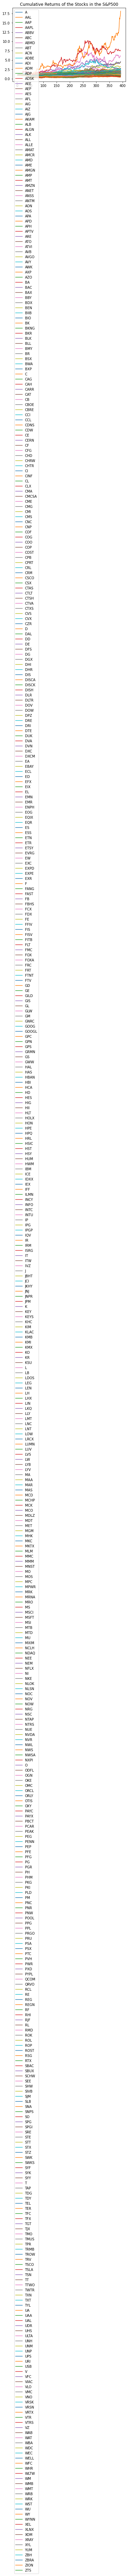

In [16]:
crs = rs.cumsum().apply(np.exp)
crs.plot(title='Cumulative Returns of the Stocks in the S&P500')

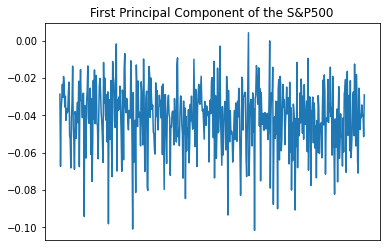

In [17]:
from sklearn.decomposition import PCA
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='First Principal Component of the S&P500')

In [22]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

NameError: ignored

In [18]:
weights = abs(pc1)/sum(abs(pc1)) # l1norm = 1
myrs = (weights*rs).sum(1)
rs_df = pd.concat([myrs, market_rs], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]
crs_df = rs_df.cumsum().apply(np.exp)
crs_df.plot(subplots=True);

NameError: ignored

In [ ]:
myrs = rs[pc1.nlargest(10).index].mean(1)
mycrs = myrs.cumsum().apply(np.exp)
market_crs = market_rs.cumsum().apply(np.exp)
mycrs.plot(title='PCA Portfolio vs. S&P500')
market_crs.plot()
plt.legend(['PCA Selection', 'S&P500'])

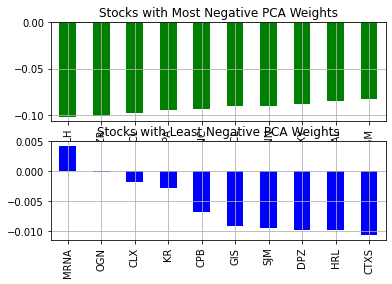

In [19]:
fig, ax = plt.subplots(2,1)
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

TypeError: ignored

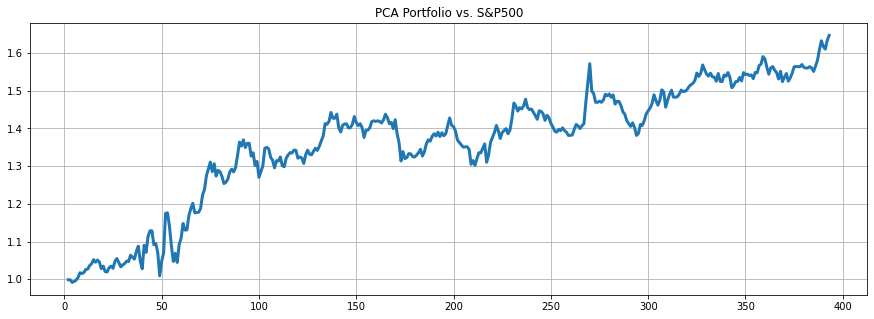

In [21]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
data['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()
plt.savefig('tmp.png')

## Anomaly Detection (PART-B)

### Load and Preprocess the data

* Inspect the S&P 500 Index Data

In [ ]:
path = 'SPY.csv'

In [ ]:
# YOUR CODE HERE

#### Data Preprocessing (1 point)

In [ ]:
# YOUR CODE HERE

### Create time series data ( 1 point)

Select the variable (column) from the data and create the series of data with a window size.

Refer [LSTM Autoencoder](https://medium.com/swlh/time-series-anomaly-detection-with-lstm-autoencoders-7bac1305e713)

In [ ]:
# YOUR CODE HERE

### Build an LSTM Autoencoder ( 2 points)

Autoencoder should take a sequence as input and outputs a sequence of the same shape.

Hint: [LSTM Autoencoder](https://medium.com/swlh/time-series-anomaly-detection-with-lstm-autoencoders-7bac1305e713)

In [ ]:
# YOUR CODE HERE

### Train the Autoencoder (1 point)

* Compile and fit the model with required parameters

In [ ]:
# YOUR CODE HERE

#### Plot metrics and evaluate the model (2 point)

In [ ]:
# YOUR CODE HERE

### Detect Anomalies in the S&P 500 Index Data (3 points)

* Predict the data and calculate the loss
* Define threshold and detect the anomalies

Discuss the Impact of COVID19 pandemic on stock prices in terms of anomalies detected during the pandemic period in stock prices

In [ ]:
# YOUR CODE HERE

### Report Analysis

* Discuss on the results of T-SNE and PCA
* Dicuss about the results of LSTM autoencoder